In [59]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import loadtxt
c=Constants()

Constants defined...


In [60]:
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

In [61]:
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 16


In [62]:
DATA='/Users/mcantiello/Dropbox (Personal)/work/rosalba/'
DATA='/Users/mcantiello/Dropbox-personal/Dropbox (Personal)/work/rosalba/'

In [94]:
MODS=['30D055','30D055_RERUN','30D055_noB_after_coreH','30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=['30D055','30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS','30D055 ST=0.01','30D055 ST=0.1','30D055 ST=0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
MODS=['40D06','30D055','30D050']#,'30D045','30D04','30D00',]#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=[r'$40 \,\rm{M}_\odot \Omega/\Omega_k = 0.60$', r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.55$', r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.50$',r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.45$',r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.40$',r'$30 \,\rm{M}_\odot \Omega/\Omega_k = 0.00$']#'40D05,'30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS','30D055 ST=0.01','30D055 ST=0.1','30D055 ST=0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
alpha=[0.5,0.8,0.5,0.5,0.5,0.5]
color=[BLUE,BLUE_GREEN,RED_PURPLE,VERMILLION,ORANGE,YELLOW]

# HR-Diagrams

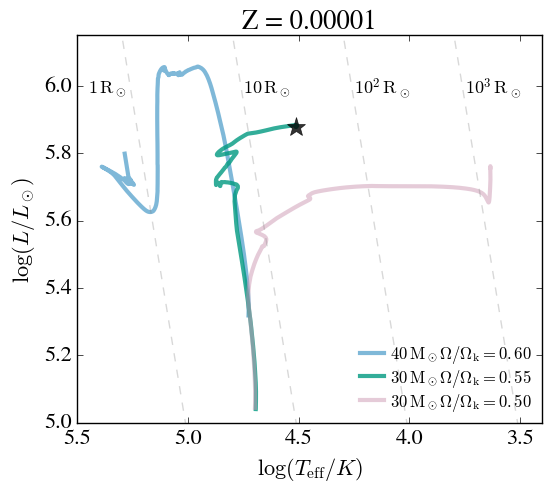

In [95]:
tt=np.arange(3,5,0.01)
ii=0
for models in MODS:
    chosen_model=DATA+models+'/LOGS/'
    h = mr.MesaData(chosen_model+'history.data')
    h1=h.center_h1
    logl=h.log_L
    logt=h.log_Teff
    loglh=h.log_LH
    model = h.model_number
    tams=find_h1(h1,model,0.1)
    plt.plot(logt,logl,linestyle='-',linewidth=3,alpha=alpha[ii],label=names[ii],color=color[ii])
    #ax.plot(logt,logl,linestyle='--',linewidth=8,color=COLORS[ii],alpha=0.5)
    #ax.plot(logt,logl,marker='s',color=BLACK,alpha=0.8,markersize=12)
    ii=ii+1
legend = plt.legend(loc='lower right',prop={'size':12})
#leg=ax.legend(loc=4,fontsize=13,scatterpoints=1)
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)
#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,5*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
tt2=np.arange(4.5,5.5,0.1)
plt.plot(tt2,np.log10(const_radius_on_hrd(10**tt2,1*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,10*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,25*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,50*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,100*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)
plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,1000*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)

h = mr.MesaData(DATA+'30D055'+'/LOGS/'+'history.data')
h1=h.center_h1
logl=h.log_L
logt=h.log_Teff
plt.plot(logt[-1],logl[-1],marker='*',color=BLACK,alpha=0.8,markersize=14)

#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,200*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.3)

#plt.xlim([4.9,3.8])
plt.axis([5.5,3.4, 5, 6.15])
##plt.grid()
plt.xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
plt.ylabel(r'$\log \left( L / L_\odot \right)$')
#plt.axis([4.2, 3.4, -0.25, 4.75])
#plt.colorbar(label=r'$\log( L_{\rm decay}/L)$')
plt.title('Z = 0.00001') #1/200 Zsun
plt.annotate(r"$1 \,\rm{R}_\odot$",(5.45,5.98),size=13)
plt.annotate(r"$10 \,\rm{R}_\odot$",(4.75,5.98),size=13)
#plt.annotate(r"$50 \rm{R}_\odot$",(4.55,5.95))
plt.annotate(r"$10^2 \,\rm{R}_\odot$",(4.25,5.98),size=13)
plt.annotate(r"$10^3 \,\rm{R}_\odot$",(3.75,5.98),size=13)

#plt.annotate(r"$10^9 \ \rm{yr}$",(3.95,1.75))
    

## Specific Angular Momentum Distribution at Core Collapse

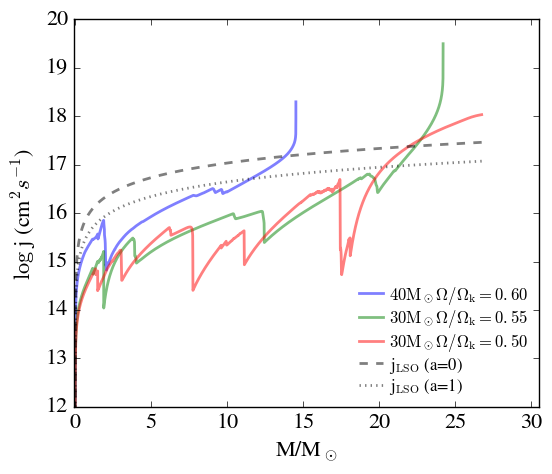

In [75]:
MODS=['40D06','30D055','30D050']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=[r'$40 \rm{M}_\odot \Omega/\Omega_k = 0.60$', r'$30 \rm{M}_\odot \Omega/\Omega_k = 0.55$', r'$30 \rm{M}_\odot \Omega/\Omega_k = 0.50$',r'$30 \rm{M}_\odot \Omega/\Omega_k = 0.00$']#'40D05,'30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS','30D055 ST=0.01','30D055 ST=0.1','30D055 ST=0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
alpha=[0.5,0.8,0.5,0.5]
color=[BLUE,BLUE_GREEN,RED_PURPLE,ORANGE]

#c  = 2.99792458e10
#G  = 6.674e-8
#msun = 1.989e33
p = mr.MesaData(DATA+'30D055_reduced_ST_after_coreH/LOGS/cc.data')
rho=10**p.logRho
kappa=p.opacity
radius=p.radius
t=p.temperature
jj=p.log_j_rot
m=p.mass
#jlso=np.log10(((6.0)**0.5)*c.G*m*c.msun/c.c)
#jlsok=np.log10(c.G*m*c.msun/c.c)

ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    jj=p.log_j_rot
    m=p.mass
    plt.plot(m,jj,linestyle='-',linewidth=2,alpha=0.5,label=names[ii])
    ii=ii+1

p = mr.MesaData(DATA+'30D050/LOGS/cc.data')
jj=p.log_j_rot
m=p.mass    
jlso=np.log10(((6.0)**0.5)*c.G*m*c.msun/c.c)
jlsok=np.log10(c.G*m*c.msun/c.c)

plt.plot(m,jlso,linestyle='--',linewidth=2,alpha=0.5,color=BLACK,label=r'j$_{\rm LSO}$ (a=0)')
plt.plot(m,jlsok,linestyle=':',linewidth=2,alpha=0.5,color=BLACK,label=r'j$_{\rm LSO}$ (a=1)')    
legend = plt.legend(loc='lower right',prop={'size':12})

#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
plt.axis([-0.1,30.5, 12,20])    
plt.xlabel(r'M/M$_\odot$')
plt.ylabel(r'$\log$ j (cm$^2 s^{-1}$)')

#fig = plt.figure(figsize=(10,8))
#ax = fig.add_axes([0.12, 0.10, 0.85, 0.84])

#plt.plot(m,jj,linestyle='-',linewidth=3)




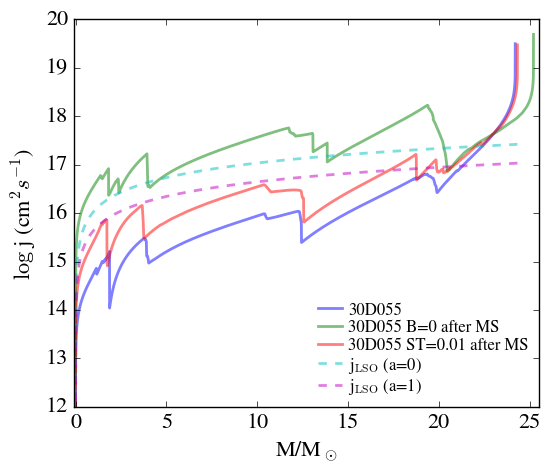

In [52]:
MODS=['30D055_RERUN','30D055_noB_after_coreH','30D055_reduced_ST_after_coreH']#,'30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=['30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS']#,'30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',

#c  = 2.99792458e10
#G  = 6.674e-8
#msun = 1.989e33
p = mr.MesaData(DATA+'30D055_reduced_ST_after_coreH/LOGS/cc.data')
rho=10**p.logRho
kappa=p.opacity
radius=p.radius
t=p.temperature
jj=p.log_j_rot
m=p.mass
jlso=np.log10(((6.0)**0.5)*c.G*m*c.msun/c.c)
jlsok=np.log10(c.G*m*c.msun/c.c)


#fig = plt.figure(figsize=(10,8))
#ax = fig.add_axes([0.12, 0.10, 0.85, 0.84])

#plt.plot(m,jj,linestyle='-',linewidth=3)


ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    jj=p.log_j_rot
    m=p.mass
    plt.plot(m,jj,linestyle='-',linewidth=2,alpha=0.5,label=names[ii])
    ii=ii+1
plt.plot(m,jlso,linestyle='--',linewidth=2,alpha=0.5,label=r'j$_{\rm LSO}$ (a=0)')
plt.plot(m,jlsok,linestyle='--',linewidth=2,alpha=0.5,label=r'j$_{\rm LSO}$ (a=1)')    
legend = plt.legend(loc='lower right',prop={'size':12})
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
plt.axis([-0.1,25.5, 12,20])    
plt.xlabel(r'M/M$_\odot$')
plt.ylabel(r'$\log$ j (cm$^2 s^{-1}$)')

## Composition at Core Collapse

Text(0.5,0,'M/M$_\\odot$')

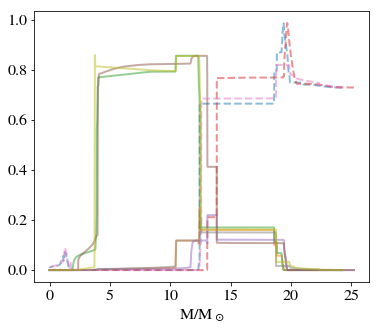

In [9]:
#fe56

ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    fe56=p.fe56
    c12=p.c12
    o16=p.o16
    ni56=p.ni56
    si28=p.si28
    he4=p.he4
    m=p.mass
    #plt.plot(m,fe56,linestyle='-',linewidth=2,alpha=0.5,label=models)
    plt.plot(m,he4,linestyle='--',linewidth=2,alpha=0.5)
    #plt.plot(m,si28,linestyle=':',linewidth=2,alpha=0.5)
    plt.plot(m,c12,linestyle='-',linewidth=2,alpha=0.5)
    plt.plot(m,o16,linestyle='-',linewidth=2,alpha=0.5)
legend = plt.legend(loc='lower right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
 

[-0.1, 5, -0.1, 1.1]

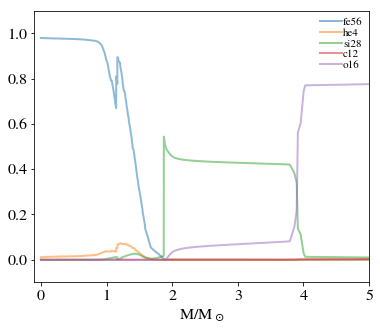

In [10]:
p = mr.MesaData(DATA+'/30D055_RERUN/LOGS/cc.data')
fe56=p.fe56
c12=p.c12
o16=p.o16
ni56=p.ni56
si28=p.si28
he4=p.he4
m=p.mass
plt.plot(m,fe56,linestyle='-',linewidth=2,alpha=0.5,label='fe56')
plt.plot(m,he4,linestyle='-',linewidth=2,alpha=0.5,label='he4')
plt.plot(m,si28,linestyle='-',linewidth=2,alpha=0.5,label='si28')
plt.plot(m,c12,linestyle='-',linewidth=2,alpha=0.5,label='c12')
plt.plot(m,o16,linestyle='-',linewidth=2,alpha=0.5,label='o16')
legend = plt.legend(loc='upper right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
plt.axis([-0.1,5, -0.1,1.1])    

[-0.1, 30, -0.1, 1.1]

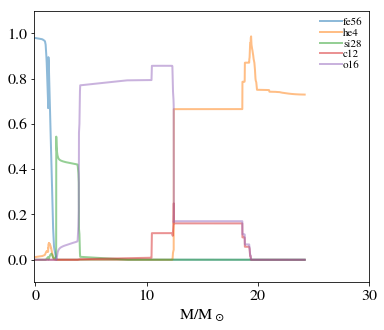

In [11]:
p = mr.MesaData(DATA+'/30D055_RERUN/LOGS/cc.data')
fe56=p.fe56
c12=p.c12
o16=p.o16
ni56=p.ni56
si28=p.si28
he4=p.he4
m=p.mass
plt.plot(m,fe56,linestyle='-',linewidth=2,alpha=0.5,label='fe56')
plt.plot(m,he4,linestyle='-',linewidth=2,alpha=0.5,label='he4')
plt.plot(m,si28,linestyle='-',linewidth=2,alpha=0.5,label='si28')
plt.plot(m,c12,linestyle='-',linewidth=2,alpha=0.5,label='c12')
plt.plot(m,o16,linestyle='-',linewidth=2,alpha=0.5,label='o16')
legend = plt.legend(loc='upper right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
#label=plt.legend(loc=1,fontsize=10,scatterpoints=1)
#leg.draw_frame(False)    
plt.axis([-0.1,30, -0.1,1.1])    

## BH-Kerr parameters

Text(0.5,0,'M/M$_\\odot$')

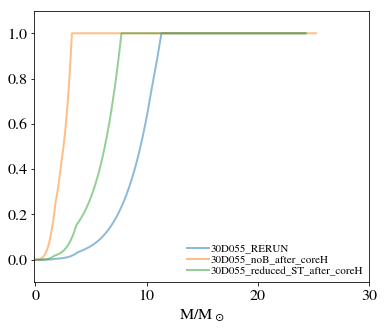

In [12]:
ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    m=p.mass
    Jtot=10**p.log_J_inside
    jmax = c.G*m/c.msun/c.c
    a=c.G*Jtot*m/c.msun/c.c
    plt.plot(m,np.minimum(a,1.0),linestyle='-',linewidth=2,alpha=0.5,label=models)
    plt.axis([-0.1,30, -0.1,1.1])
legend = plt.legend(loc='lower right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')

24.2058951139 1.0
24.2058951139 1.0
24.2058951139 1.0
24.2058951139 1.0
24.2058951138 1.0
24.2058951137 1.0
24.2058951136 1.0
24.2058951133 1.0
24.2058951126 1.0
24.2058951119 1.0
24.2058951105 1.0
24.2058951087 1.0
24.2058951047 1.0
24.2058951011 1.0
24.205895099 1.0
24.2058950958 1.0
24.2058950907 1.0
24.2058950877 1.0
24.2058950852 1.0
24.20589508 1.0
24.2058950774 1.0
24.2058950743 1.0
24.2058950718 1.0
24.2058950671 1.0
24.2058950644 1.0
24.2058950596 1.0
24.2058950562 1.0
24.2058950502 1.0
24.205895046 1.0
24.2058950439 1.0
24.2058950406 1.0
24.2058950345 1.0
24.2058950309 1.0
24.2058950248 1.0
24.2058950199 1.0
24.2058950174 1.0
24.2058950129 1.0
24.2058950074 1.0
24.2058950022 1.0
24.2058949972 1.0
24.2058949937 1.0
24.2058949882 1.0
24.2058949831 1.0
24.2058949772 1.0
24.2058949693 1.0
24.2058949659 1.0
24.2058949595 1.0
24.2058949536 1.0
24.2058949477 1.0
24.2058949424 1.0
24.2058949363 1.0
24.2058949301 1.0
24.205894927 1.0
24.2058949198 1.0
24.2058949136 1.0
24.205894906 1.

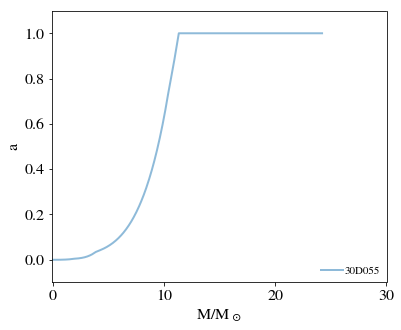

In [15]:
p = mr.MesaData(DATA+'/30D055_RERUN/LOGS/cc.data')
m=p.mass
Jtot=10**p.log_J_inside
jmax = c.G*m/c.msun/c.c
a=c.G*Jtot*m/c.msun/c.c
plt.plot(m,np.minimum(a,1.0),linestyle='-',linewidth=2,alpha=0.5,label='30D055')
plt.axis([-0.1,30, -0.1,1.1])
legend = plt.legend(loc='lower right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
plt.ylabel(r'a')
i=0
for mm in m:
    print(m[i],np.minimum(a[i],1.0))
    i=i+1


Text(0,0.5,'a')

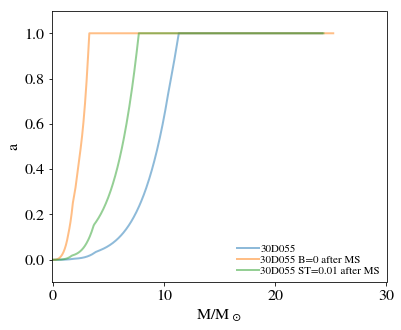

In [14]:
MODS=['30D055_RERUN','30D055_noB_after_coreH','30D055_reduced_ST_after_coreH']#,'30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
names=['30D055','30D055 B=0 after MS','30D055 ST=0.01 after MS']#,'30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_after_coreH','30D055_reduced_ST_0.01','30D055_reduced_ST_0.1','30D055_reduced_ST_0.5']#,'30D055_reduced_ST_0.1','30D055_reduced_ST_0.5','30D055_reduced_ST_after_coreH', '30D055_rot_mu1.0'] # '30D055_rot_mu1.0_after_coreH',
ii=0
for models in MODS:
    p = mr.MesaData(DATA+models+'/LOGS/cc.data')
    m=p.mass
    Jtot=10**p.log_J_inside
    jmax = c.G*m/c.msun/c.c
    a=c.G*Jtot*m/c.msun/c.c
    plt.plot(m,np.minimum(a,1.0),linestyle='-',linewidth=2,alpha=0.5,label=names[ii])
    ii=ii+1
plt.axis([-0.1,30, -0.1,1.1])
legend = plt.legend(loc='lower right',prop={'size':11})
plt.xlabel(r'M/M$_\odot$')
plt.ylabel(r'a')
